In [1]:
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
from utils import entropy, uniqueness, completeness

In [2]:
train_df = pandas.read_csv('../data/train.csv')
test_df = pandas.read_csv('../data/test.csv')

train_samples_count = len(train_df)
test_samples_count = len(test_df)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
id_column = 'PassengerId'
target_column = 'Survived'
categorical = [
    'Pclass',
    'Name',
    'Sex',
    'SibSp',
    'Parch',
    'Ticket',
    'Cabin',
    'Embarked'
]
numerical = [
    'Age',
    'Fare'
]

In [6]:
column_infos = train_df[categorical].agg([completeness, uniqueness, entropy], axis='index').transpose()
column_infos

,completeness,uniqueness,entropy
Pclass,1.000000,0.003367,1.439321
Name,1.000000,1.000000,9.799282
Sex,1.000000,0.002245,0.936205
SibSp,1.000000,0.007856,1.338559
Parch,1.000000,0.007856,1.128337
Ticket,1.000000,0.764310,9.233001
Cabin,0.228956,0.164983,7.065688
Embarked,0.997755,0.003367,1.096869


In [7]:
train_df[numerical].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110b1e1d0>,
      dtype=object)

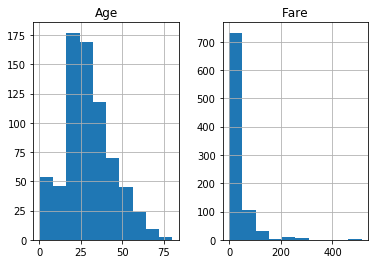

In [8]:
train_df.hist(column=numerical, bins=10)